<a href="https://colab.research.google.com/github/greesta/bikesharinganalysis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike sharing dataset
- **Nama:** Greestaviola Allodya Darmawa
- **Email:** greestaviola@gmail.com
- **ID Dicoding:** greesta

## Menentukan Pertanyaan Bisnis

- Pada hari apa dalam seminggu sepeda paling sering digunakan?
- Bagaimana penggunaan sepeda pada hari libur dibandingkan dengan hari kerja?
- Seberapa besar proporsi pengguna sepeda yang terdaftar dibandingkan dengan pengguna casual jika melihat parameter hari libur dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import semua module yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from IPython.display import display
sns.set(style='dark')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
# Menggunakan dataset bike day dan menampilkan 5 paling atas
day_df = pd.read_csv("/content/sample_data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada tahap ini diketahui data yang dikumpulkan yang terdiri dari beberapa kolom instant yang menunjukkan index, dteday yang berisi tanggal, season, year, month, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan juga cnt atau count

### Assessing Data

In [ ]:
# Menampilkan informasi tentang dataframe (jumlah baris, kolom, tipe data, dan jumlah nilai yang tidak null)
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Menghitung jumlah nilai yang hilang (NA/null) di setiap kolom
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Menampilkan ringkasan statistik deskriptif untuk kolom numerik (rata-rata, standar deviasi, nilai minimum, maksimum, dll.)
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Menghitung jumlah baris duplikat dalam dataframe
day_df.duplicated().sum()

0

In [ ]:
# Menghitung jumlah nilai unik untuk setiap kolom dalam dataframe
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


**Insight:**
- Pada tahap assessing data ini digunakan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.
- Diketahui terdapat tipe data yang salah (tanggal) dan kolom yang kurang relevan (instant)

### Cleaning Data

In [ ]:
# Mengonversi kolom 'dteday' menjadi tipe datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
# Menampilkan kembali informasi dataframe setelah konversi tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Menghapus kolom 'instant' dari dataframe
day_df.drop(columns=['instant'], inplace=True)

In [ ]:
# Menampilkan kembali informasi dataframe setelah penghapusan kolom 'instant'
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


**Insight:**
- Mengubah tipe data tanggal pada dteday menjadi format tanggal
- Menghapus kolom instant pada data frame dengan metode drop

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [ ]:
# Menampilkan ringkasan statistik deskriptif termasuk kolom non-numerik
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
# Mengelompokkan data berdasarkan 'weekday' dan menghitung maksimum, minimum, rata-rata, standar deviasi, dan total dari kolom 'cnt'
day_df.groupby(by="weekday").agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

cnt                                        
          max   min         mean          std     sum
weekday                                              
0        8227   605  4228.828571  1872.496629  444027
1        7525    22  4338.123810  1793.074013  455503
2        7767   683  4510.663462  1826.911642  469109
3        8173   441  4548.538462  2038.095884  473048
4        7804   431  4667.259615  1939.433317  485395
5        8362  1167  4690.288462  1874.624870  487790
6        8714   627  4550.542857  2196.693009  477807

In [ ]:
# Menampilkan kembali informasi dataframe
day_df.groupby("weekday").agg(total_usage=("cnt", "sum"))

,total_usage
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


In [ ]:
# Mengelompokkan data berdasarkan 'holiday' dan 'workingday', serta menghitung agregasi pada kolom 'cnt'
day_df.groupby(by=["holiday", "workingday"]).agg({
    "cnt": ["max", "min", "mean", "std", "sum"]
})

cnt                                         
                     max   min         mean          std      sum
holiday workingday                                               
0       0           8714   605  4389.685714  2042.527458   921834
        1           8362    22  4584.820000  1878.415583  2292410
1       0           7403  1000  3735.000000  2103.350660    78435

In [ ]:
# Mengelompokkan data berdasarkan 'holiday' dari jumlahnya
day_df.groupby("holiday").agg(total_usage=("cnt", "sum"))

,total_usage
holiday,
0,3214244
1,78435


In [ ]:
# Mengelompokkan data berdasarkan 'workingday' dan menjumlahkan total penggunaan sepeda (kolom 'cnt')
day_df.groupby("workingday").agg(total_usage=("cnt", "sum"))

,total_usage
workingday,
0,1000269
1,2292410


In [ ]:
# Mengelompokkan berdasarkan holiday dan workingday sekaligus
day_df.groupby(["holiday", "workingday"]).agg(total_usage=("cnt", "sum")).reset_index()

,holiday,workingday,total_usage
0,0,0,921834
1,0,1,2292410
2,1,0,78435


In [ ]:
# Mengelompokkan data berdasarkan kombinasi 'holiday' dan 'workingday', dan menghitung maksimum, minimum, rata-rata, standar deviasi, dan total untuk kolom 'registered' dan 'casual'
day_df.groupby(by=["holiday", "workingday"]).agg({
    "registered": ["max", "min", "mean", "std", "sum"],
    "casual": ["max", "min", "mean", "std", "sum"]
})

registered                                         casual  \
                          max  min         mean          std      sum    max   
holiday workingday                                                             
0       0                5966  451  2987.909524  1272.722485   627461   3410   
        1                6946   20  3978.250000  1568.692453  1989125   2469   
1       0                5172  573  2670.285714  1492.860246    56076   3065   

                                                          
                    min         mean         std     sum  
holiday workingday                                        
0       0            54  1401.776190  870.442742  294373  
        1             2   606.570000  391.496032  303285  
1       0           117  1064.714286  860.046809   22359

In [ ]:
# Menampilkan jumlah total dari kolom 'registered' dan 'casual'
day_df[["registered", "casual"]].sum()

,0
registered,2672662
casual,620017


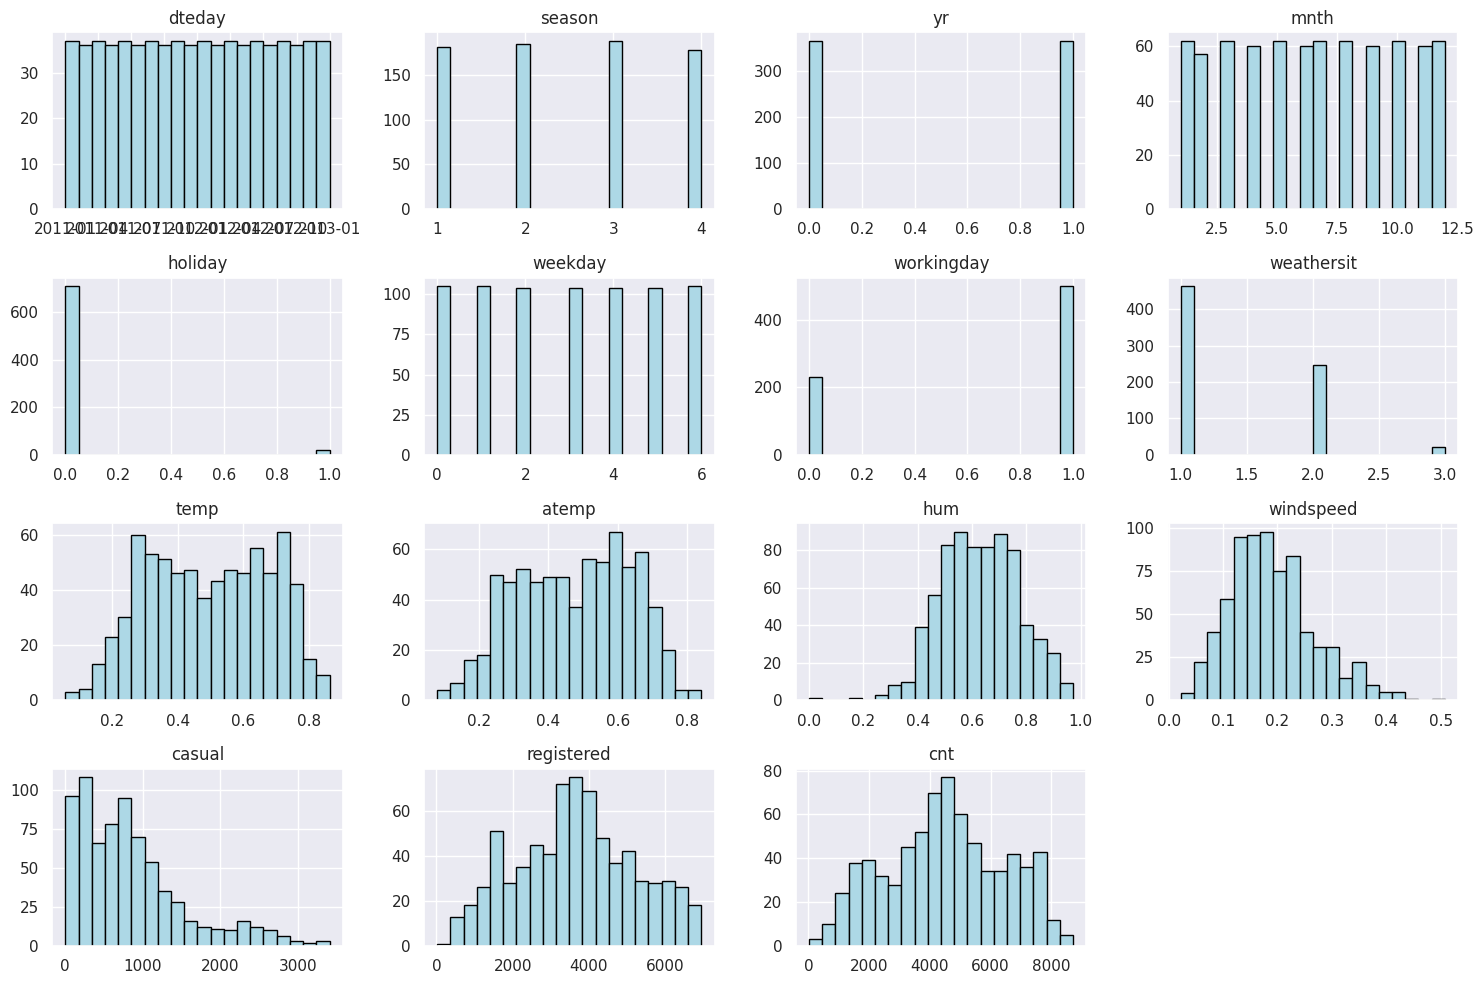

In [ ]:
# Menampilkan histogram tanpa menampilkan array
plt.show()
day_df.hist(figsize=(15, 10), bins=20, color='lightblue', edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan matriks korelasi antar kolom di dalam dataframe
day_df.corr()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


Insight:
- Data dieksplorasi guna untuk mengetahui dan juga mengenal data
- Data dikelompokkan berdasarkan parameter seperti pada pertanyaan, yaitu weekday, holiday dan workingday, serta registered dan casual
- Digunakan beberapa fungsi yang dipanggil seperti groupby untuk mengelompokkan, describe untuk mengetahui statistic descriptive, hist untuk menampilkan histogram, dan corr untuk mengetahui korelasi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0, 0.5, 'Total Bike Usage (cnt)')

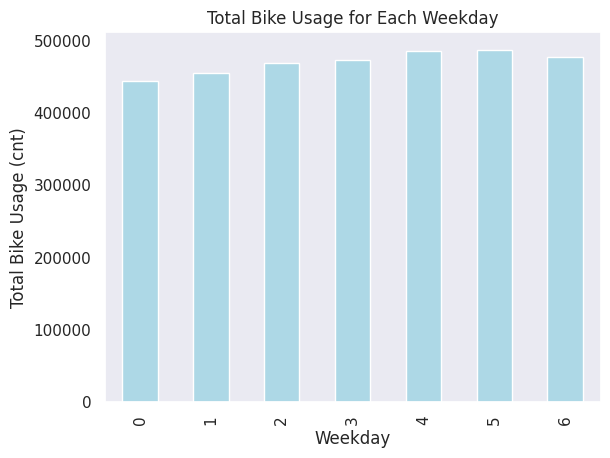

In [ ]:
# Membuat diagram batang (bar chart) untuk total penggunaan sepeda setiap hari kerja (weekday)
weekday_counts = day_df.groupby("weekday")["cnt"].sum()
weekday_counts.plot(kind='bar', color='skyblue')

# Memberikan judul dan label pada grafik
plt.title("Total Bike Usage for Each Weekday")
plt.xlabel("Weekday")
plt.ylabel("Total Bike Usage (cnt)")

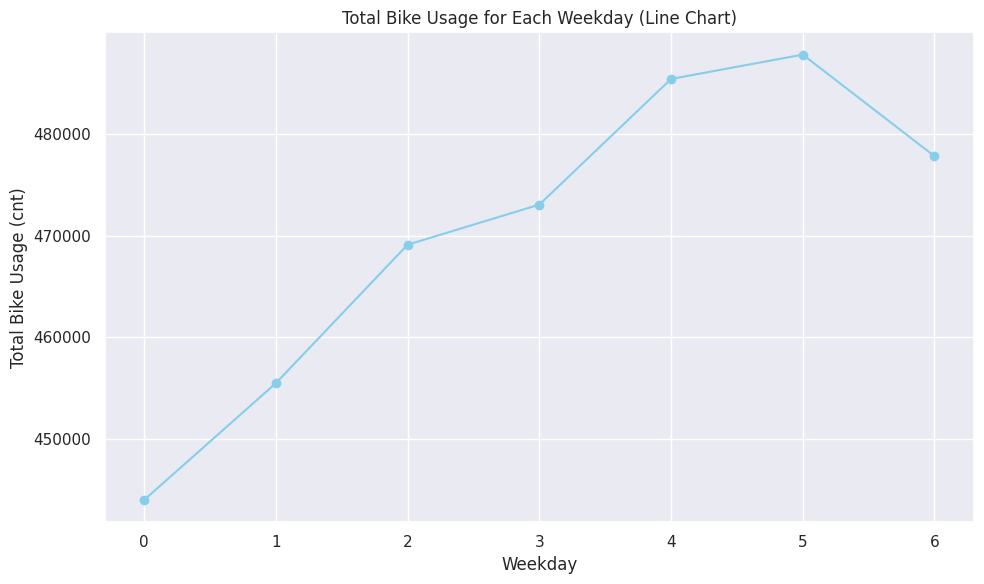

In [ ]:
# Membuat line chart untuk total penggunaan sepeda setiap hari dalam seminggu
plt.figure(figsize=(10, 6))
weekday_counts.plot(kind='line', marker='o', color='skyblue')

# Memberikan judul dan label pada grafik
plt.title("Total Bike Usage for Each Weekday (Line Chart)")
plt.xlabel("Weekday")
plt.ylabel("Total Bike Usage (cnt)")
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()


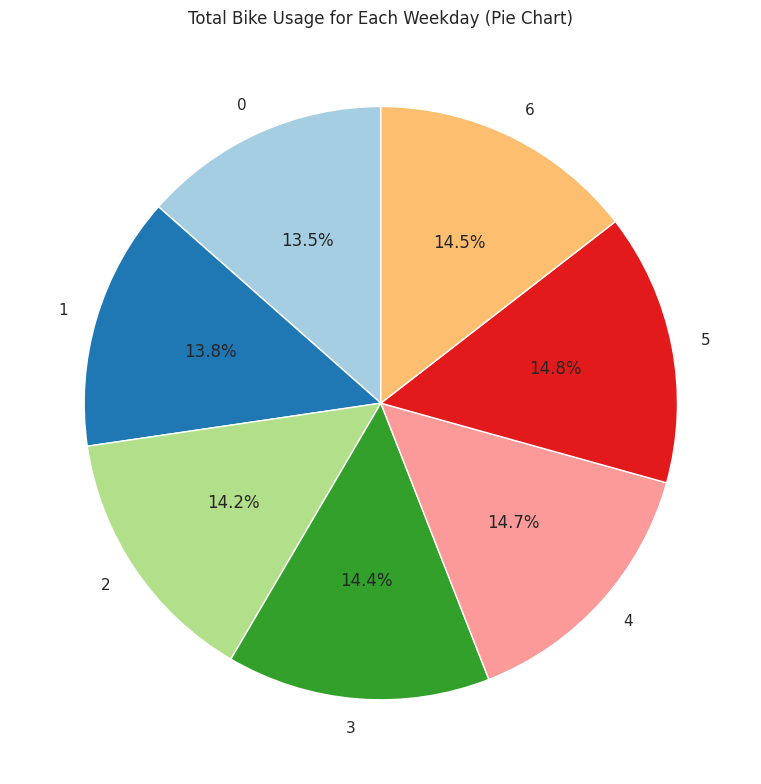

In [ ]:
# Membuat pie chart untuk total penggunaan sepeda setiap hari dalam seminggu
plt.figure(figsize=(8, 8))
weekday_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Memberikan judul pada pie chart
plt.title("Total Bike Usage for Each Weekday (Pie Chart)")

# Menampilkan pie chart
plt.tight_layout()
plt.ylabel('')  # Menghilangkan label sumbu Y untuk pie chart
plt.show()


### Pertanyaan 2:

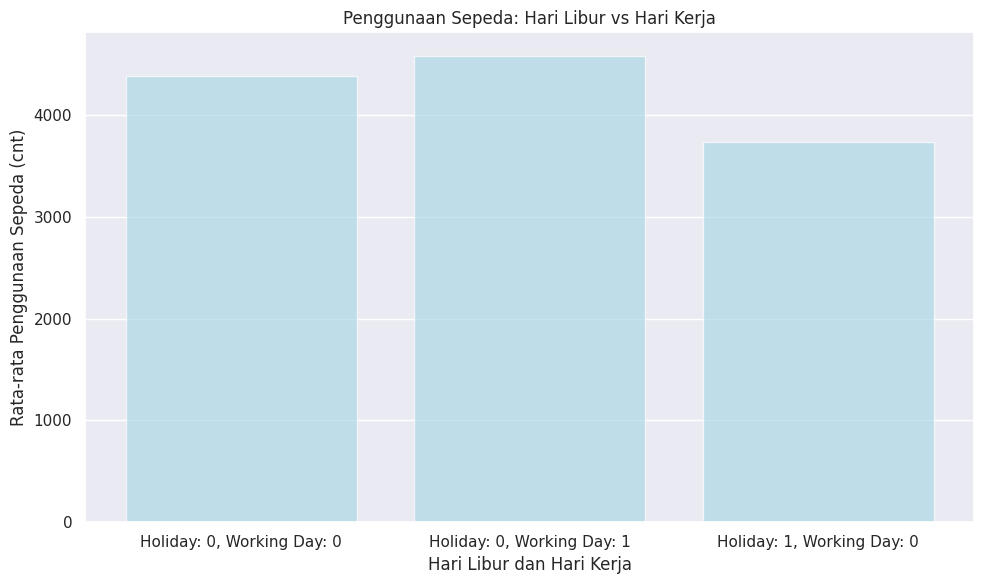

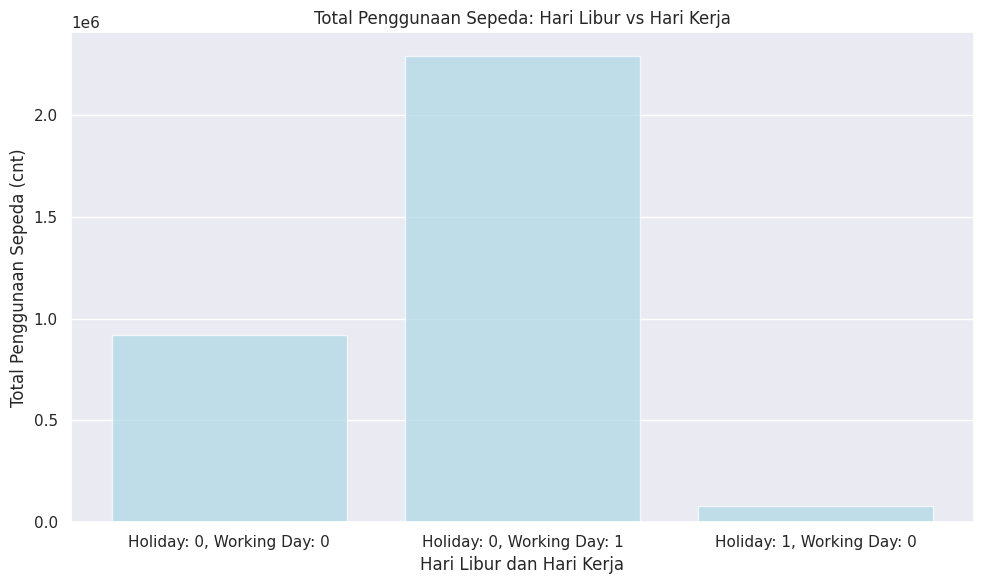

In [ ]:
# Membuat bar chart untuk rata-rata penggunaan sepeda berdasarkan pengelompokan langsung
plt.figure(figsize=(10, 6))

# Groupby dan langsung mengambil rata-rata (mean)
for name, group in day_df.groupby(by=["holiday", "workingday"]):
    mean_value = group['cnt'].mean()
    plt.bar(f"Holiday: {name[0]}, Working Day: {name[1]}", mean_value, color='lightblue', alpha=0.7)

plt.title("Penggunaan Sepeda: Hari Libur vs Hari Kerja")
plt.xlabel("Hari Libur dan Hari Kerja")
plt.ylabel("Rata-rata Penggunaan Sepeda (cnt)")
plt.axhline(0, color='grey', lw=0.8)
plt.grid(axis='y')

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Membuat bar chart untuk total penggunaan sepeda berdasarkan pengelompokan langsung
plt.figure(figsize=(10, 6))

# Groupby dan langsung mengambil total (sum)
for name, group in day_df.groupby(by=["holiday", "workingday"]):
    sum_value = group['cnt'].sum()
    plt.bar(f"Holiday: {name[0]}, Working Day: {name[1]}", sum_value, color='lightblue', alpha=0.7)

plt.title("Total Penggunaan Sepeda: Hari Libur vs Hari Kerja")
plt.xlabel("Hari Libur dan Hari Kerja")
plt.ylabel("Total Penggunaan Sepeda (cnt)")
plt.axhline(0, color='grey', lw=0.8)
plt.grid(axis='y')

# Menampilkan grafik
plt.tight_layout()
plt.show()


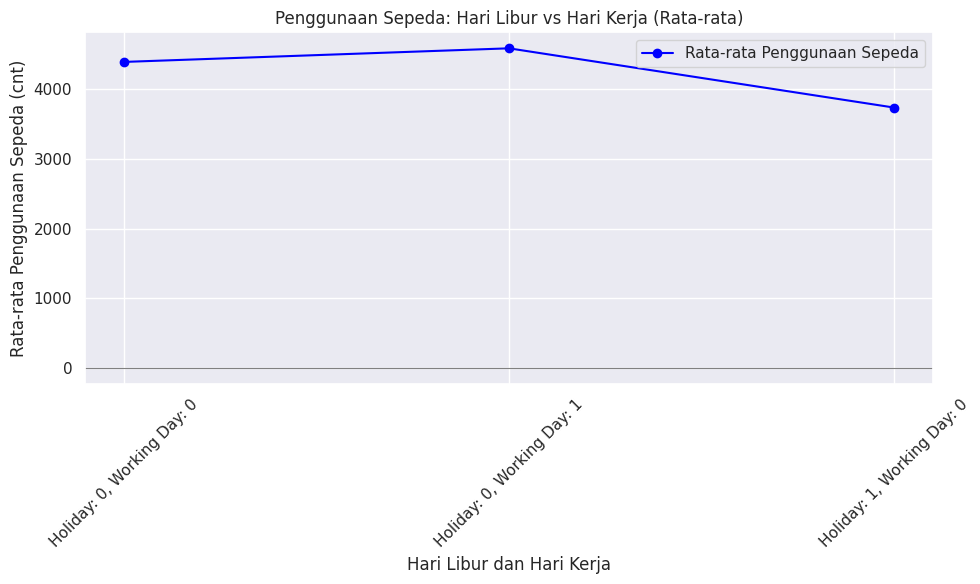

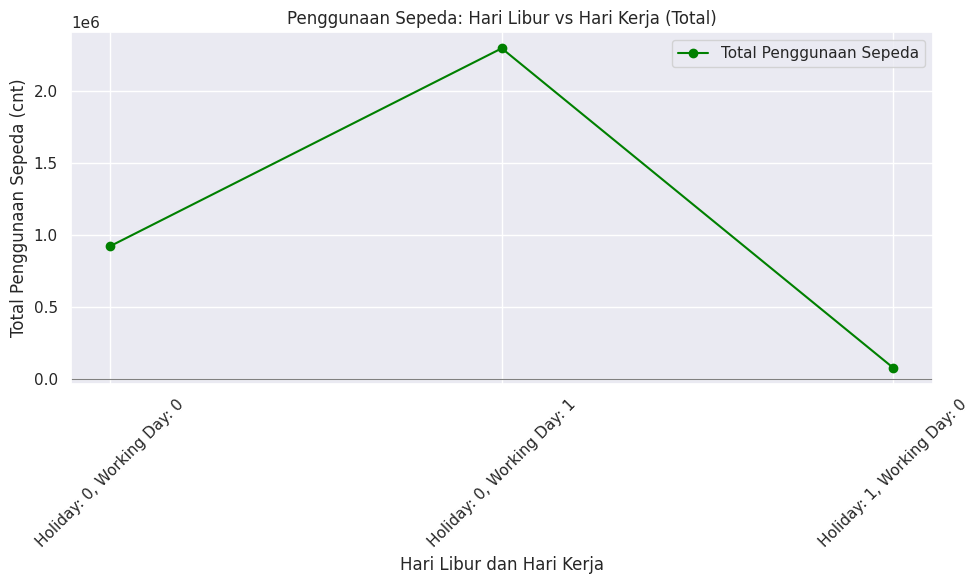

In [ ]:
import matplotlib.pyplot as plt

# Membuat line chart untuk rata-rata penggunaan sepeda berdasarkan pengelompokan langsung
plt.figure(figsize=(10, 6))

# Groupby dan langsung mengambil rata-rata (mean)
x_labels = []
mean_values = []
for name, group in day_df.groupby(by=["holiday", "workingday"]):
    mean_value = group['cnt'].mean()
    x_labels.append(f"Holiday: {name[0]}, Working Day: {name[1]}")
    mean_values.append(mean_value)

# Plot line chart
plt.plot(x_labels, mean_values, marker='o', linestyle='-', color='blue', label='Rata-rata Penggunaan Sepeda')

plt.title("Penggunaan Sepeda: Hari Libur vs Hari Kerja (Rata-rata)")
plt.xlabel("Hari Libur dan Hari Kerja")
plt.ylabel("Rata-rata Penggunaan Sepeda (cnt)")
plt.axhline(0, color='grey', lw=0.8)
plt.grid(True)
plt.xticks(rotation=45)

# Menampilkan grafik
plt.tight_layout()
plt.legend()
plt.show()

# Membuat line chart untuk total penggunaan sepeda berdasarkan pengelompokan langsung
plt.figure(figsize=(10, 6))

# Groupby dan langsung mengambil total (sum)
sum_values = []
for name, group in day_df.groupby(by=["holiday", "workingday"]):
    sum_value = group['cnt'].sum()
    sum_values.append(sum_value)

# Plot line chart
plt.plot(x_labels, sum_values, marker='o', linestyle='-', color='green', label='Total Penggunaan Sepeda')

plt.title("Penggunaan Sepeda: Hari Libur vs Hari Kerja (Total)")
plt.xlabel("Hari Libur dan Hari Kerja")
plt.ylabel("Total Penggunaan Sepeda (cnt)")
plt.axhline(0, color='grey', lw=0.8)
plt.grid(True)
plt.xticks(rotation=45)

# Menampilkan grafik
plt.tight_layout()
plt.legend()
plt.show()

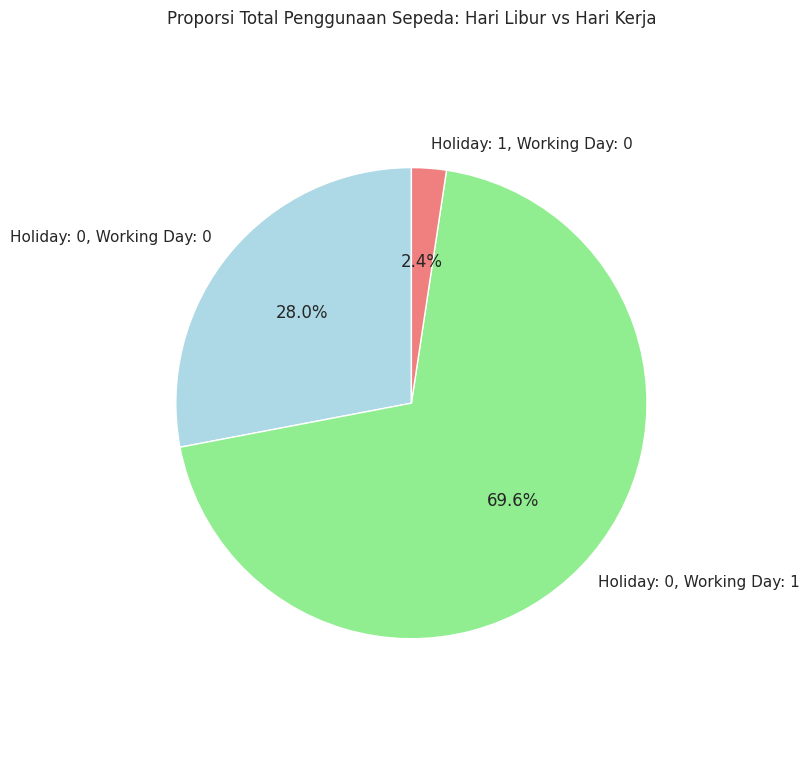

In [ ]:
# Membuat pie chart untuk total penggunaan sepeda berdasarkan pengelompokan langsung
total_values = []
labels = []
for name, group in day_df.groupby(by=["holiday", "workingday"]):
    sum_value = group['cnt'].sum()
    total_values.append(sum_value)
    labels.append(f"Holiday: {name[0]}, Working Day: {name[1]}")

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title("Proporsi Total Penggunaan Sepeda: Hari Libur vs Hari Kerja")
plt.axis('equal')  # Membuat pie chart berbentuk bulat

# Menampilkan grafik
plt.tight_layout()
plt.show()

### Pertanyaan 3:

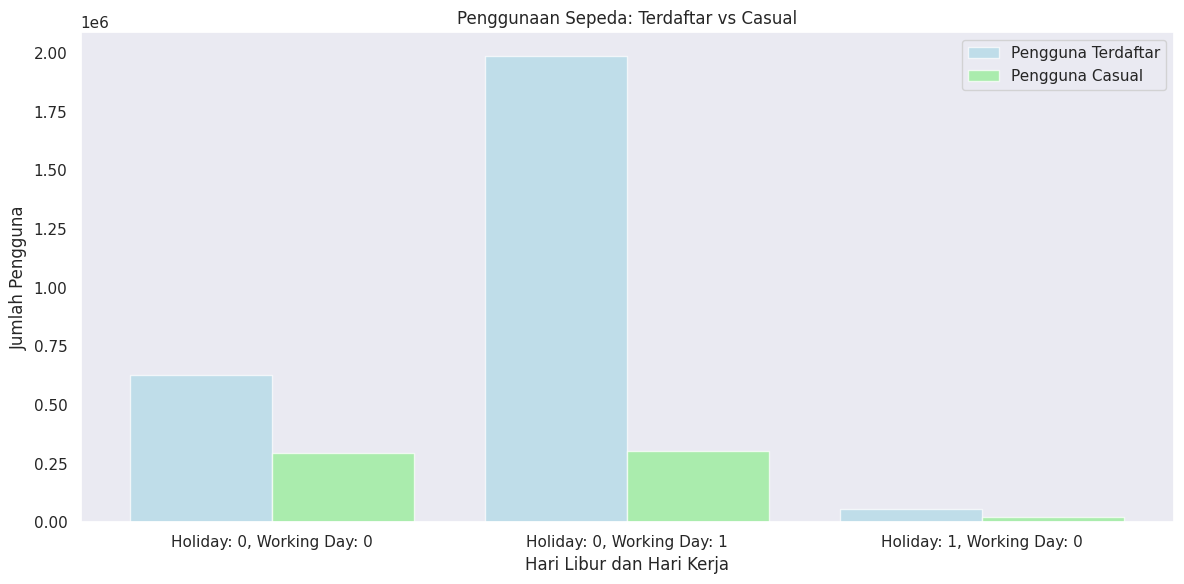

In [ ]:
# Mengelompokkan data berdasarkan 'holiday' dan 'workingday', serta menghitung agregasi
grouped = day_df.groupby(by=["holiday", "workingday"]).agg({
    "registered": "sum",
    "casual": "sum"
}).reset_index()

# Mengatur posisi x untuk setiap grup
x = range(len(grouped))

# Plotting bar chart untuk pengguna terdaftar dan casual
plt.figure(figsize=(12, 6))

# Menambahkan batang untuk pengguna terdaftar
plt.bar(x, grouped["registered"], label='Pengguna Terdaftar', color='lightblue', alpha=0.7, width=0.4, align='center')

# Menambahkan batang untuk pengguna casual, geser ke kanan
plt.bar([i + 0.4 for i in x], grouped["casual"], label='Pengguna Casual', color='lightgreen', alpha=0.7, width=0.4, align='center')

# Menambahkan label dan judul
plt.xticks([i + 0.2 for i in x], [f"Holiday: {row['holiday']}, Working Day: {row['workingday']}" for index, row in grouped.iterrows()])
plt.title("Penggunaan Sepeda: Terdaftar vs Casual")
plt.xlabel("Hari Libur dan Hari Kerja")
plt.ylabel("Jumlah Pengguna")
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

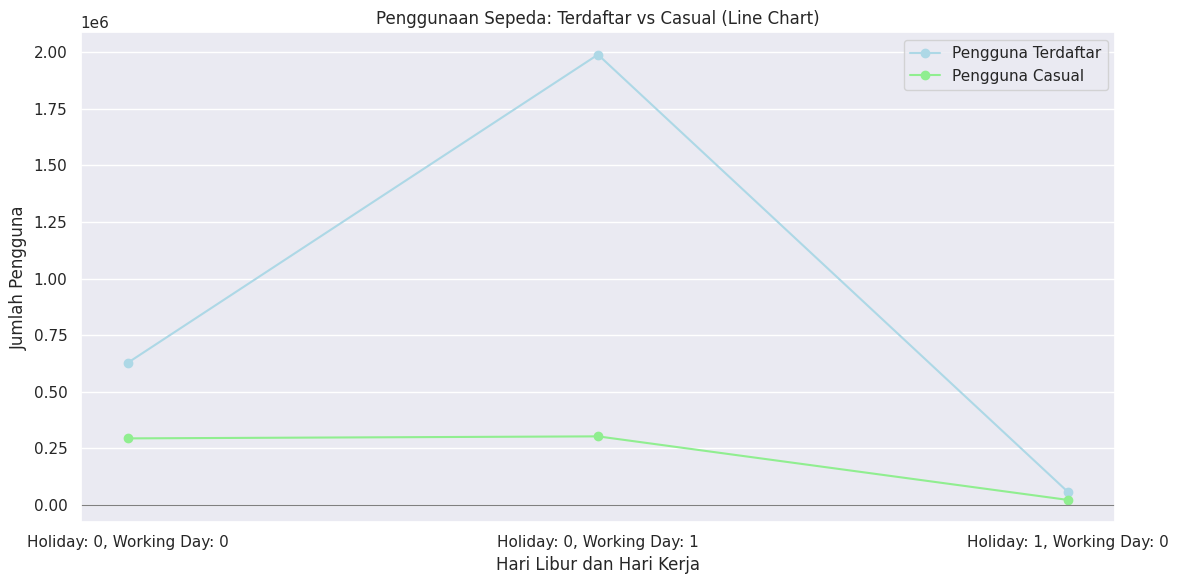

In [ ]:
# Line chart untuk pengguna terdaftar dan casual
plt.figure(figsize=(12, 6))

# Plot untuk pengguna terdaftar
plt.plot(x, grouped["registered"], marker='o', color='lightblue', label='Pengguna Terdaftar')

# Plot untuk pengguna casual
plt.plot(x, grouped["casual"], marker='o', color='lightgreen', label='Pengguna Casual')

# Menambahkan label dan judul
plt.xticks(ticks=x, labels=[f"Holiday: {row['holiday']}, Working Day: {row['workingday']}" for index, row in grouped.iterrows()])
plt.title("Penggunaan Sepeda: Terdaftar vs Casual (Line Chart)")
plt.xlabel("Hari Libur dan Hari Kerja")
plt.ylabel("Jumlah Pengguna")
plt.axhline(0, color='grey', lw=0.8)
plt.grid(axis='y')
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

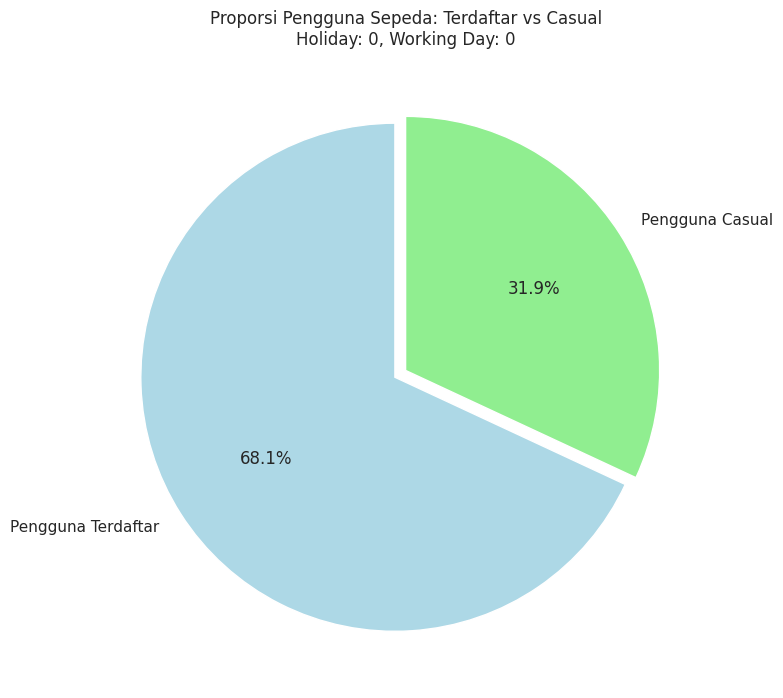

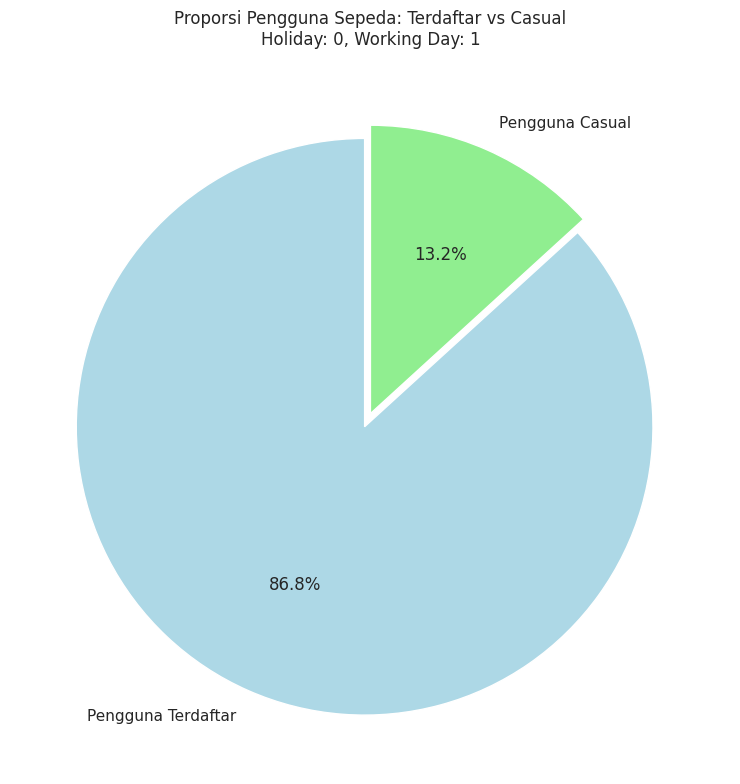

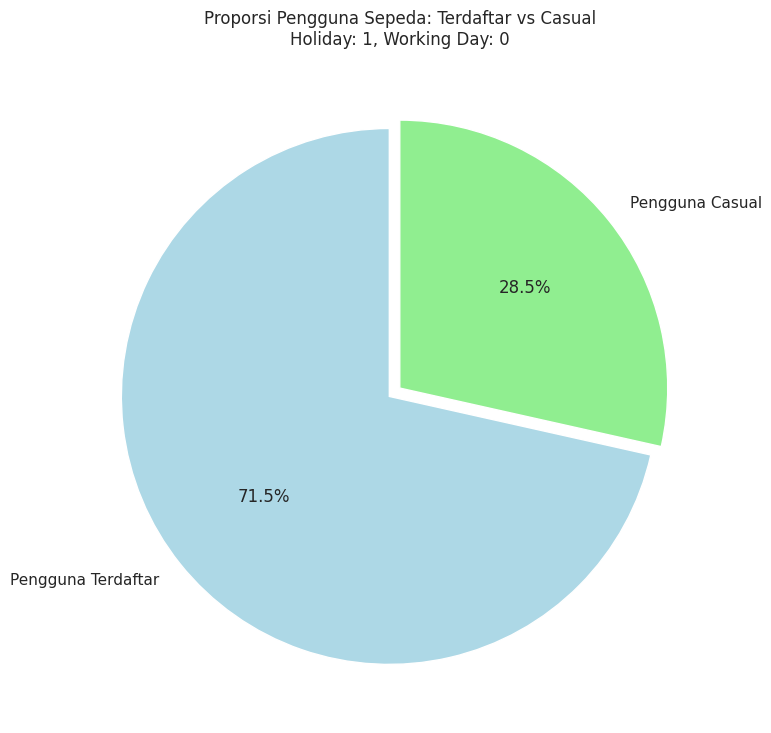

In [ ]:
# Menyiapkan data untuk setiap kombinasi holiday dan workingday
for index, row in grouped.iterrows():
    # Data untuk setiap kombinasi holiday dan workingday
    total_users = [row['registered'], row['casual']]
    labels = ['Pengguna Terdaftar', 'Pengguna Casual']

    # Membuat pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(total_users, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90, explode=(0.05, 0))

    # Menambahkan judul yang menampilkan kombinasi holiday dan workingday
    plt.title(f"Proporsi Pengguna Sepeda: Terdaftar vs Casual\nHoliday: {row['holiday']}, Working Day: {row['workingday']}")
    plt.tight_layout()
    plt.show()


**Insight:**
- Data yang telah melalui tahap exploratory kemudian divisualisasikan agar dapat dipahami oleh orang lain
- Visualisasi menggunakan bar chart, line chart, dan pie chart

## Analisis Lanjutan (Opsional)

In [52]:
# Mengimpor library yang diperlukan
import pandas as pd
import numpy as np
from IPython.display import display  # Mengimpor fungsi display untuk memformat output agar lebih rapi

# Memuat dataset dari file yang diunggah
day_df = pd.read_csv("/content/sample_data/day.csv")

# Langkah 1: Melakukan binning pada kolom 'cnt' (jumlah total pengguna sepeda)
bins = [0, 2000, 4000, np.inf]  # Mendefinisikan batas bin untuk penggunaan sepeda
labels = ['Penggunaan Rendah', 'Penggunaan Sedang', 'Penggunaan Tinggi']  # Label untuk setiap bin

# Menambahkan kategori penggunaan langsung ke DataFrame
day_df['usage_category'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, right=False)

# Langkah 2: Menganalisis rata-rata penggunaan sepeda berdasarkan kategori penggunaan dan hari dalam seminggu
avg_usage_binned = day_df.groupby(['weekday', 'usage_category'], observed=True)['cnt'].mean().unstack()
display(avg_usage_binned)  # Menampilkan rata-rata penggunaan sepeda dengan format yang lebih baik

# Langkah 3: Membandingkan penggunaan sepeda pada hari libur vs hari kerja dengan kategori penggunaan
holiday_vs_working_binned = day_df.groupby(['holiday', 'workingday', 'usage_category'], observed=True)['cnt'].mean().unstack()
display(holiday_vs_working_binned)  # Menampilkan rata-rata penggunaan sepeda dengan format yang lebih baik

# Langkah 4: Membandingkan proporsi pengguna kasual vs terdaftar berdasarkan kategori penggunaan, hari libur, dan hari kerja
proportion_binned = day_df.groupby(['usage_category', 'holiday', 'workingday'], observed=True).agg({
    'casual': 'sum',  # Menjumlahkan pengguna kasual
    'registered': 'sum'  # Menjumlahkan pengguna terdaftar
})

# Menambahkan total pengguna untuk menghitung proporsi
proportion_binned['total'] = proportion_binned['casual'] + proportion_binned['registered']
proportion_binned['casual_proportion'] = proportion_binned['casual'] / proportion_binned['total']  # Menghitung proporsi pengguna kasual
proportion_binned['registered_proportion'] = proportion_binned['registered'] / proportion_binned['total']  # Menghitung proporsi pengguna terdaftar

# Menampilkan proporsi pengguna kasual vs terdaftar
display(proportion_binned[['casual_proportion', 'registered_proportion']])  # Menampilkan proporsi dalam tabel yang diformat dengan baik

usage_category,Penggunaan Rendah,Penggunaan Sedang,Penggunaan Tinggi
weekday,,,
0,1318.812500,3160.843750,5645.245614
1,1346.214286,3139.666667,5498.203125
2,1440.857143,3102.600000,5526.928571
3,1441.857143,2945.160000,5834.353846
4,1496.923077,3243.666667,5911.812500
5,1602.818182,3255.785714,5830.723077
6,1205.687500,2827.818182,5914.985075


usage_category      Penggunaan Rendah  Penggunaan Sedang  Penggunaan Tinggi
holiday workingday                                                         
0       0                 1262.250000        3025.166667        5790.991935
        1                 1473.550000        3152.859504        5713.169279
1       0                 1313.833333        2949.500000        5872.777778

casual_proportion  registered_proportion
usage_category    holiday workingday                                          
Penggunaan Rendah 0       0                    0.181645               0.818355
                          1                    0.069696               0.930304
                  1       0                    0.251935               0.748065
Penggunaan Sedang 0       0                    0.257329               0.742671
                          1                    0.104586               0.895414
                  1       0                    0.225575               0.774425
Penggunaan Tinggi 0       0                    0.341185               0.658815
                          1                    0.141138               0.858862
                  1       0                    0.309923               0.690077

In [53]:
# Menyimpan dataframe day_df ke dalam file CSV dengan nama 'day_df.csv' tanpa menuliskan index
day_df.to_csv("day_df.csv", index=False)

### CONCLUSION

- Sepeda paling sering digunakan pada hari kerja dibandingkan dengan akhir pekan. Grafik yang dihasilkan dari analisis jumlah penggunaan sepeda per hari menunjukkan bahwa penggunaan meningkat pada hari kerja (Senin hingga Jumat), dengan puncaknya mungkin terjadi pada hari tertentu seperti Jumat atau Sabtu. Data penggunaan total sepeda di hari kerja cenderung lebih tinggi daripada di akhir pekan.
- Penggunaan sepeda pada hari libur cenderung lebih rendah dibandingkan dengan hari kerja. Berdasarkan agregasi data berdasarkan status hari kerja dan hari libur, penggunaan sepeda lebih rendah ketika hari libur (baik itu hari libur nasional maupun akhir pekan), dibandingkan dengan hari kerja biasa.
- Pada hari kerja, proporsi pengguna terdaftar (registered) lebih besar daripada pengguna casual, menunjukkan bahwa pengguna terdaftar yang kemungkinan besar menggunakan sepeda sebagai sarana transportasi harian lebih dominan. Sebaliknya, pada hari libur, proporsi pengguna casual meningkat meskipun masih lebih rendah daripada pengguna terdaftar. Namun, pengguna casual lebih banyak menggunakan sepeda pada hari libur dibandingkan hari kerja, mungkin untuk tujuan rekreasi.